## Exploratory Data Analysis

#### Dataset : 
Life Expectancy Data

#### Source: 
Kaggle

#### Dataset Description: 
It contains information of 193 countries related to life expectancy, health factors and some economic data like GDP for the years 2000 to 2015.

#### Aim:
This case study aims at finding the factors that contribute to increase in life expectancy (target attribute) of the citizens of each country.

#### Approach:
1. Did my own research on which factors influence life expectancy of a person
2. Then went through the data given in the dataset
3. Applied some data pre-processing followed by Univariate and Bivariate Analysis of the attributes provided
4. The data also had some missing values which were treated with appropriate logics.

##### Note: In this notebook, the steps of data pre-processing and data visualization along with their inferences is covered.

#### Attributes:
'Country': 193 countries

'Year': 2000 -2015

'Status': Developed or Developing status

'Life expectancy ': Life Expectancy in age

'Adult Mortality': Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

'infant deaths': Number of Infant Deaths per 1000 population

'Alcohol': Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

'percentage expenditure': Expenditure on health as a percentage of Gross Domestic Product per capita(%)

'Hepatitis B': Hepatitis B  immunization coverage among 1-year-olds (%)

'Measles ': number of reported cases per 1000 population

'BMI': Average Body Mass Index of entire population

'under-five deaths ': Number of under-five deaths per 1000 population

'Polio': Polio (Pol3) immunization coverage among 1-year-olds (%)

'Total expenditure': General government expenditure on health as a percentage of total government expenditure (%)

'Diphtheria ': Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

'HIV/AIDS': Deaths per 1000 live births HIV/AIDS (0-4 years)

'GDP': Gross Domestic Product per capita (in USD)

'Population': Population of the country

'thinness 1-19 years': Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

'thinness 5-9 years': Prevalence of thinness among children for Age 5 to 9(%)

'Income composition of resources': Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

'Schooling': Number of years of Schooling(years)


### 1. Importing the libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category= DataConversionWarning)
warnings.simplefilter(action='ignore',category=FutureWarning)

### 2. Reading the Dataset

In [106]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [107]:
## get columns of the dataset

df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [108]:
## get information about the datatypes of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

### 3. Data Pre-processing

In [109]:
## removing the leading and trailing spaces from attribute names

df.columns = [i.strip() for i in df.columns.tolist()]

In [110]:
## renaming the attribute as given in description

df.rename(columns = {'thinness  1-19 years':'thinness 10-19 years'},inplace = True)

In [111]:
## making the attribute names of similar format

df.columns = [i.replace(' ','_').lower() for i in df.columns.tolist()]

In [112]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [113]:
## renaming the attribute under-five_deaths 

df.rename(columns = {'under-five_deaths':'under_five_deaths'},inplace = True)

In [114]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [115]:
## get the numerical attributes

num_cols = df.select_dtypes(exclude = 'object').columns.tolist()
print(num_cols)

['year', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [116]:
## get categorical attributes

cat_cols = df.select_dtypes(include = 'object').columns.tolist()
print(cat_cols)

['country', 'status']


### 4. Descriptive Statistics

In [117]:
## for numerical columns

df[num_cols].describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [118]:
## for categorical columns

df[cat_cols].describe()

,country,status
count,2938,2938
unique,193,2
top,Antigua and Barbuda,Developing
freq,16,2426


### 5. Univariate Analysis

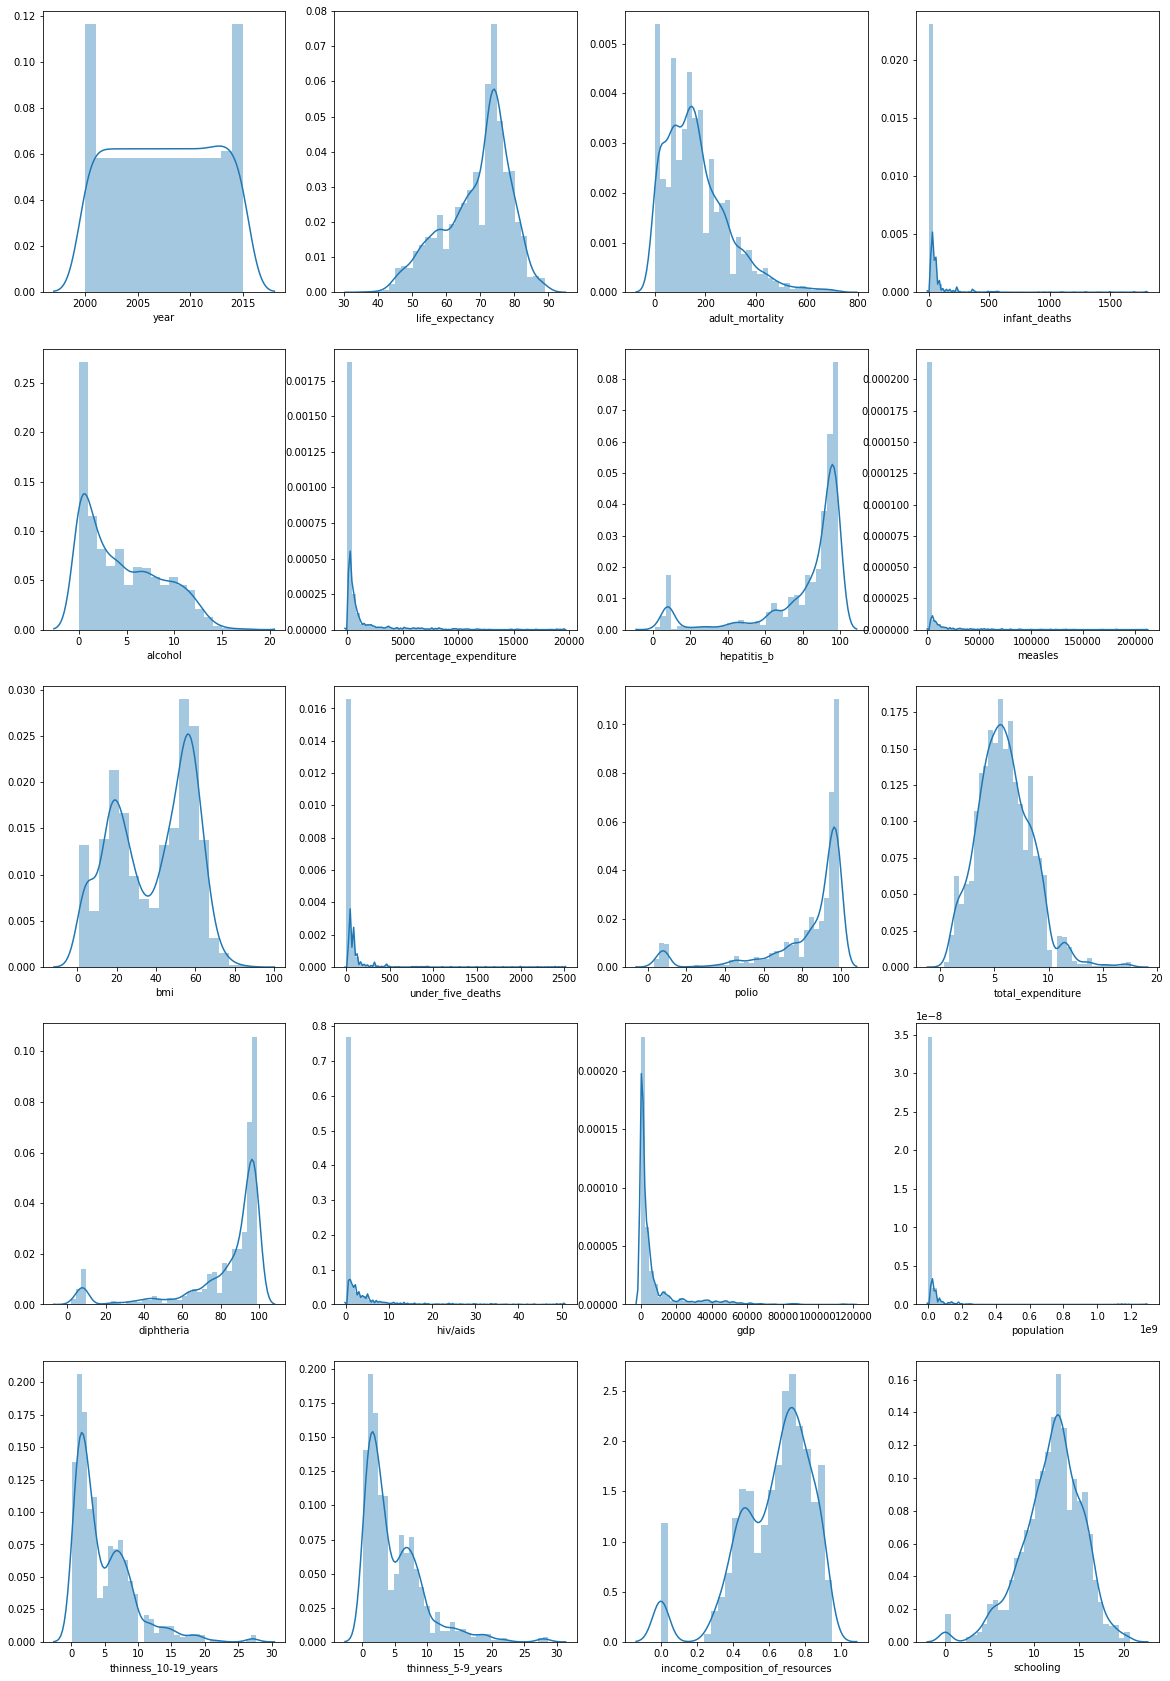

In [15]:
## plotting a distribution plot for numerical columns

plt.figure(figsize=(20,30))

for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.distplot(df[num_cols[i]].dropna())

plt.show()

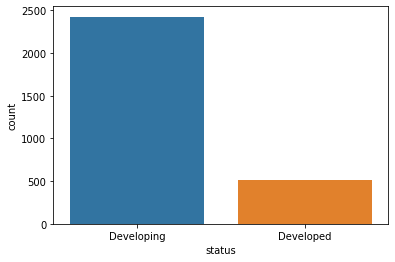

In [16]:
## count plot for categorical column

sns.countplot(df['status'].dropna())
plt.show()

## Inferences from Univariate Analysis:
1. Life expectancy varies between 60 to 80 for most of the countries
2. Adult Mortality, the probability of people dying between 15 to 60 years of age per 1000 population is very low. However there are some countries where the ratio is high which is rare
3. The number of Infant deaths/under 5 deaths or due to HIV is low but some countries have a high number. It might be due to lack of access to medical facilities
4. Alcohol Consumption is high in few countries that is above 15L
5. The expenses provided to an individual for health related facilites is very low 
6. The immunization coverage among one year old is very less for Hepatitis B, diptheria and Polio in some countries which may be developing/ under-developed conturies 
7. Number of cases for measles is low
8. The average BMI of countries is distributed into 3 groups
9. The overall expenditure on health by the general government is moderate in many countries and a few have high
10. GDP per capita is high for few countries as they might be having good domestic/educational/health faciltities.
11. The Human development index is observed to be distributed into 3 groups
12. Most countries have schooling years between 10 to 15
13. The countries that have high prevelance in thinness for the age groups(10-19 and 5-9) may be due to malnutrition.

### 6. Bivariate Analysis

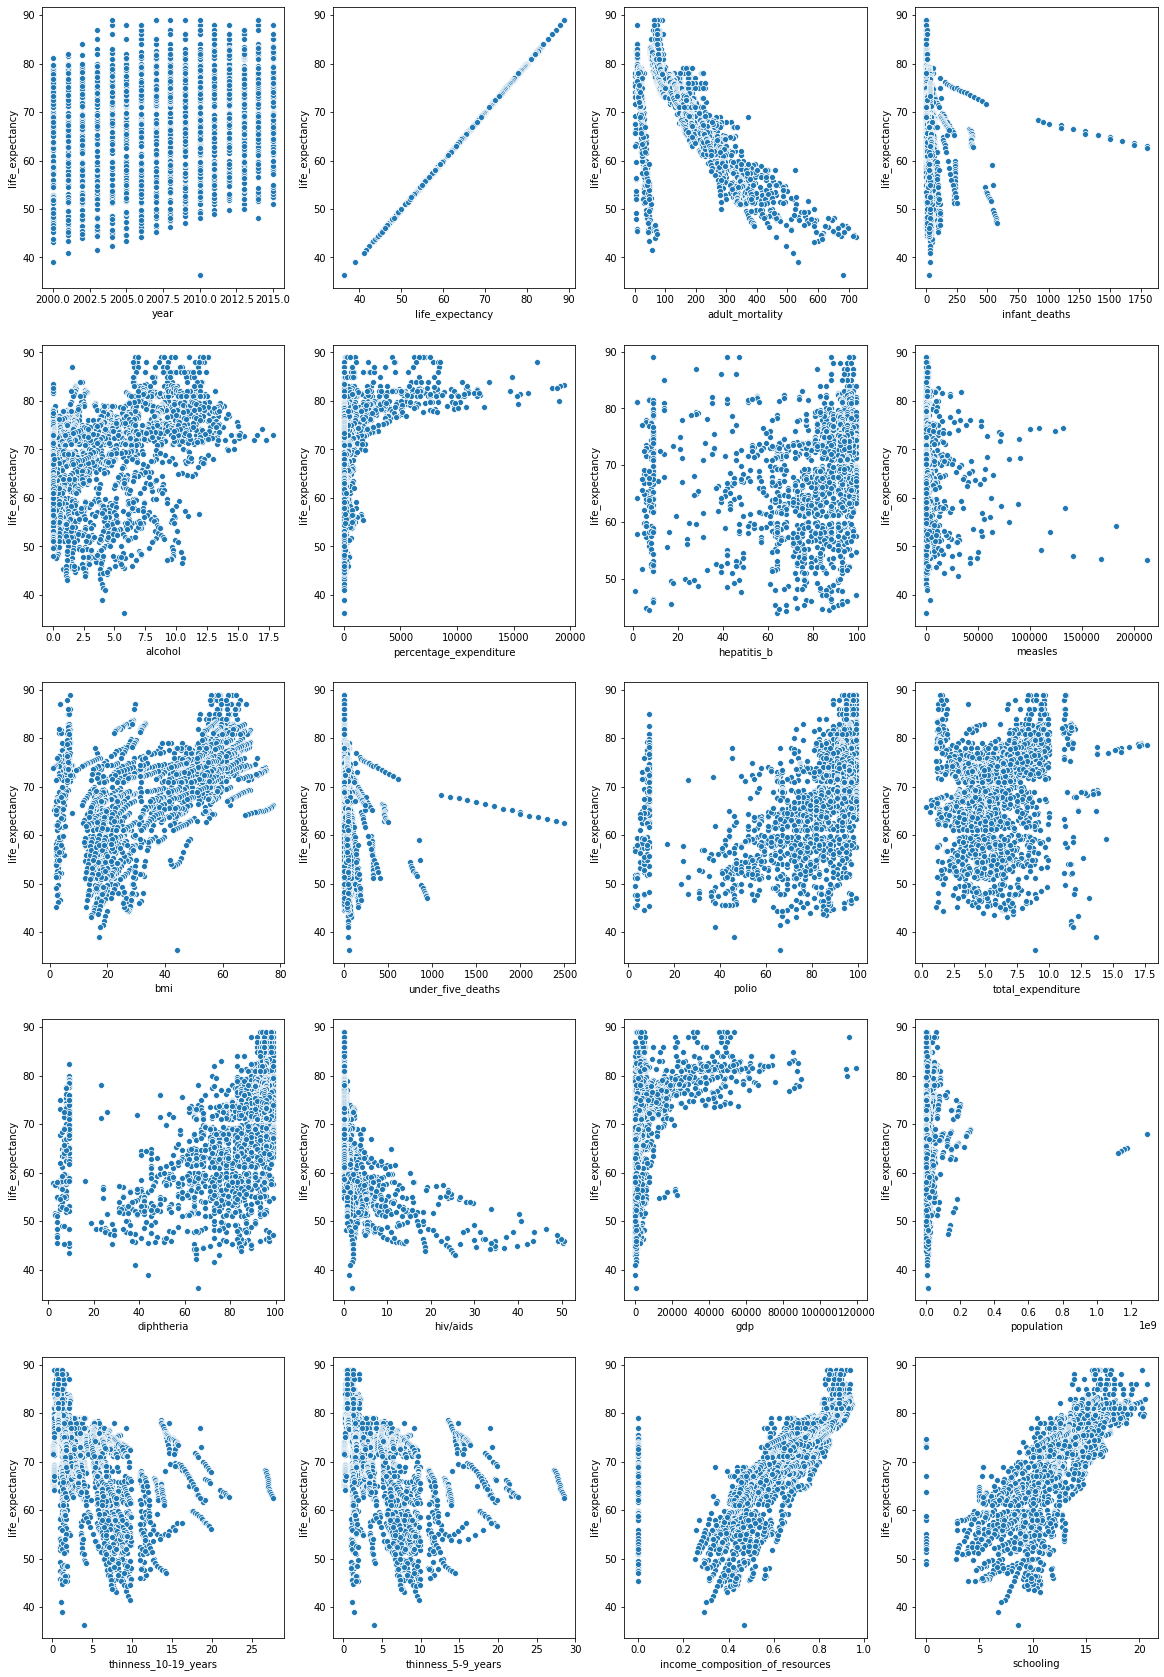

In [17]:
## scatter plot for numerical vs numerical attributes

plt.figure(figsize=(20,30))

for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x = num_cols[i], y = 'life_expectancy', data = df)

plt.show()

##### The features that contribute towards high life expectancy are, 
    1. percent expenditure
    2. GDP (per capita)
    3. income composition of resources
    4. schooling
##### For other features there is no specific pattern observed.

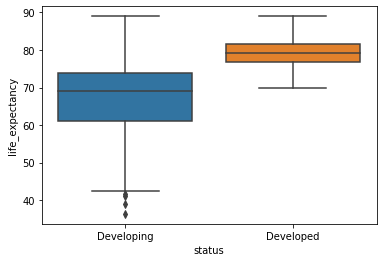

In [18]:
## boxplot for categorical vs numerical attribute

sns.boxplot(x = 'status', y = 'life_expectancy', data = df)
plt.show()

## Analysing the Developed Countries

In [19]:
## get only developed countries
df[df['status']=='Developed'].head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8


In [20]:
developed = df[df['status']=='Developed']

In [21]:
developed.shape

(512, 22)

In [22]:
pd.DataFrame(developed.groupby('country')['life_expectancy'].mean()).sort_values(by = 'life_expectancy', ascending = False)

,life_expectancy
country,
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
Italy,82.18750
Spain,82.06875
Australia,81.81250
Norway,81.79375
Austria,81.48125


In [23]:
dev_yle = pd.DataFrame(developed.groupby(['country','year'])[['life_expectancy','percentage_expenditure',
                                                              'total_expenditure','gdp','schooling']].mean())
dev_yle.head(15)

life_expectancy  percentage_expenditure  total_expenditure  \
country   year                                                               
Australia 2000             79.5              347.187360               8.80   
          2001             79.9             3064.301144               8.18   
          2002             79.9               46.387182               8.39   
          2003             83.0             3829.550928               8.32   
          2004             86.0              588.568371               8.57   
          2005             81.0              579.133164               8.45   
          2006             81.2             6187.062017               8.49   
          2007             81.3              872.598609               8.53   
          2008             81.3             8547.292357               8.78   
          2009             81.7             7172.275229               9.50   
          2010             81.9             8875.786493               9.20   
          2011             82.0            10986.265270               9.20   
          2012             82.3            11714.998580               9.36   
          2013             82.5            11734.853810               9.36   
          2014             82.7            10769.363050               9.42   

                        gdp  schooling  
country   year                          
Australia 2000   2169.92100       20.4  
          2001  19517.84168       20.5  
          2002    281.81763       20.1  
          2003  23465.38559       20.6  
          2004   3472.37977       20.7  
          2005   3416.71483       20.3  
          2006  36118.28381       20.3  
          2007   4991.98289       19.0  
          2008  49664.68540       19.1  
          2009  42742.99898       19.1  
          2010  51874.84800       19.5  
          2011  62245.12900       19.8  
          2012  67677.63477       20.1  
          2013  67792.33860       20.3  
          2014  62214.69120       20.4

## Analysing the Developing Countries


In [24]:
## get only developed countries

df[df['status']=='Developing'].head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
developing = df[df['status']=='Developing']

In [26]:
developing.shape

(2426, 22)

In [27]:
pd.DataFrame(developing.groupby('country')['life_expectancy'].mean()).sort_values(by = 'life_expectancy', ascending = False).head()

,life_expectancy
country,
France,82.21875
Canada,81.68750
Israel,81.30000
Greece,81.21875
Finland,80.71250


In [28]:
udev_yle = pd.DataFrame(developing.groupby(['country','year'])[['life_expectancy','percentage_expenditure',
'total_expenditure','gdp','schooling']].mean())

In [29]:
udev_yle.head(16)

life_expectancy  percentage_expenditure  total_expenditure  \
country     year                                                               
Afghanistan 2000             54.8               10.424960               8.20   
            2001             55.3               10.574728               7.80   
            2002             56.2               16.887351               7.76   
            2003             56.7               11.089053               8.82   
            2004             57.0               15.296066               8.79   
            2005             57.3                1.388648               8.70   
            2006             57.3               17.171518               7.43   
            2007             57.5               10.910156               6.73   
            2008             58.1               25.873925               8.33   
            2009             58.6               56.762217               9.42   
            2010             58.8               79.679367               9.20   
            2011             59.2                7.097109               7.87   
            2012             59.5               78.184215               8.52   
            2013             59.9               73.219243               8.13   
            2014             59.9               73.523582               8.18   
            2015             65.0               71.279624               8.16   

                         gdp  schooling  
country     year                         
Afghanistan 2000  114.560000        5.5  
            2001  117.496980        5.9  
            2002  187.845950        6.2  
            2003  198.728544        6.5  
            2004  219.141353        6.8  
            2005   25.294130        7.9  
            2006  272.563770        8.1  
            2007  369.835796        8.4  
            2008  373.361116        8.7  
            2009  445.893298        8.9  
            2010  553.328940        9.2  
            2011   63.537231        9.5  
            2012  669.959000        9.8  
            2013  631.744976        9.9  
            2014  612.696514       10.0  
            2015  584.259210       10.1

In [30]:
developed.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,512.000000,512.000000,512.000000,512.000000,484.000000,512.000000,339.000000,512.000000,512.000000,512.000000,512.000000,480.000000,512.000000,5.120000e+02,448.000000,4.160000e+02,512.000000,512.000000,464.000000,464.000000
mean,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,1.000000e-01,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
std,4.614281,3.930942,47.877583,4.585774,2.765858,3824.200588,20.489240,2529.084588,17.196829,5.384006,10.783713,2.984389,12.531113,8.890471e-16,22870.827763,1.479524e+07,0.756577,0.829099,0.052843,1.766799
min,2000.000000,69.900000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,3.200000,0.000000,9.000000,1.100000,9.000000,1.000000e-01,12.277330,1.230000e+02,0.300000,0.200000,0.703000,11.500000
25%,2003.750000,76.800000,58.000000,0.000000,8.617500,92.904052,89.000000,0.000000,53.775000,0.000000,93.000000,6.407500,93.750000,1.000000e-01,3875.740910,1.993282e+05,0.700000,0.600000,0.815000,14.700000
50%,2007.500000,79.250000,73.000000,0.000000,10.320000,846.615644,95.000000,12.000000,57.450000,0.000000,96.000000,7.895000,96.000000,1.000000e-01,13560.723860,1.167660e+06,1.100000,1.000000,0.862000,15.800000
75%,2011.250000,81.700000,96.000000,1.000000,11.697500,4102.863046,97.000000,96.500000,61.300000,2.000000,98.000000,9.212500,98.000000,1.000000e-01,36760.425993,5.759450e+06,1.900000,1.900000,0.894000,16.800000
max,2015.000000,89.000000,229.000000,28.000000,15.190000,19479.911610,99.000000,33812.000000,69.600000,33.000000,99.000000,17.600000,99.000000,1.000000e-01,119172.741800,8.253418e+07,4.000000,4.300000,0.948000,20.700000


In [31]:
developing.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2426.000000,2416.000000,2416.000000,2426.000000,2260.000000,2426.000000,2046.000000,2426.000000,2392.000000,2426.000000,2407.000000,2232.000000,2407.000000,2426.000000,2042.000000,1.870000e+03,2392.000000,2392.000000,2307.000000,2311.000000
mean,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256
std,4.614690,9.006092,127.974557,128.942509,3.347537,846.655356,25.564884,12528.811419,19.425091,175.379909,24.671531,2.233756,24.834300,5.526145,8772.467789,6.702886e+07,4.514453,4.606130,0.201597,3.056601
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,61.100000,92.000000,1.000000,0.517500,3.616102,75.000000,0.000000,18.300000,1.000000,74.000000,4.140000,75.000000,0.100000,382.749830,1.938082e+05,2.100000,2.100000,0.466500,9.600000
50%,2008.000000,69.000000,163.000000,6.000000,2.560000,48.431829,91.000000,18.000000,35.200000,7.000000,91.000000,5.400000,91.000000,0.100000,1246.021671,1.404827e+06,4.500000,4.600000,0.631000,11.700000
75%,2012.000000,74.000000,253.000000,28.000000,5.750000,257.702204,97.000000,514.500000,53.200000,39.000000,97.000000,6.830000,96.500000,1.400000,4147.739877,7.735673e+06,7.725000,7.800000,0.727000,13.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,9748.636237,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,88564.822980,1.293859e+09,27.700000,28.600000,0.919000,18.300000


##### The developed countries have a very high life expectancy in age. 
##### This indicates that the developed countries invest a good amount of money for providing facilities of education and healthcare to their citizens

### 7. Multi-variate Analysis

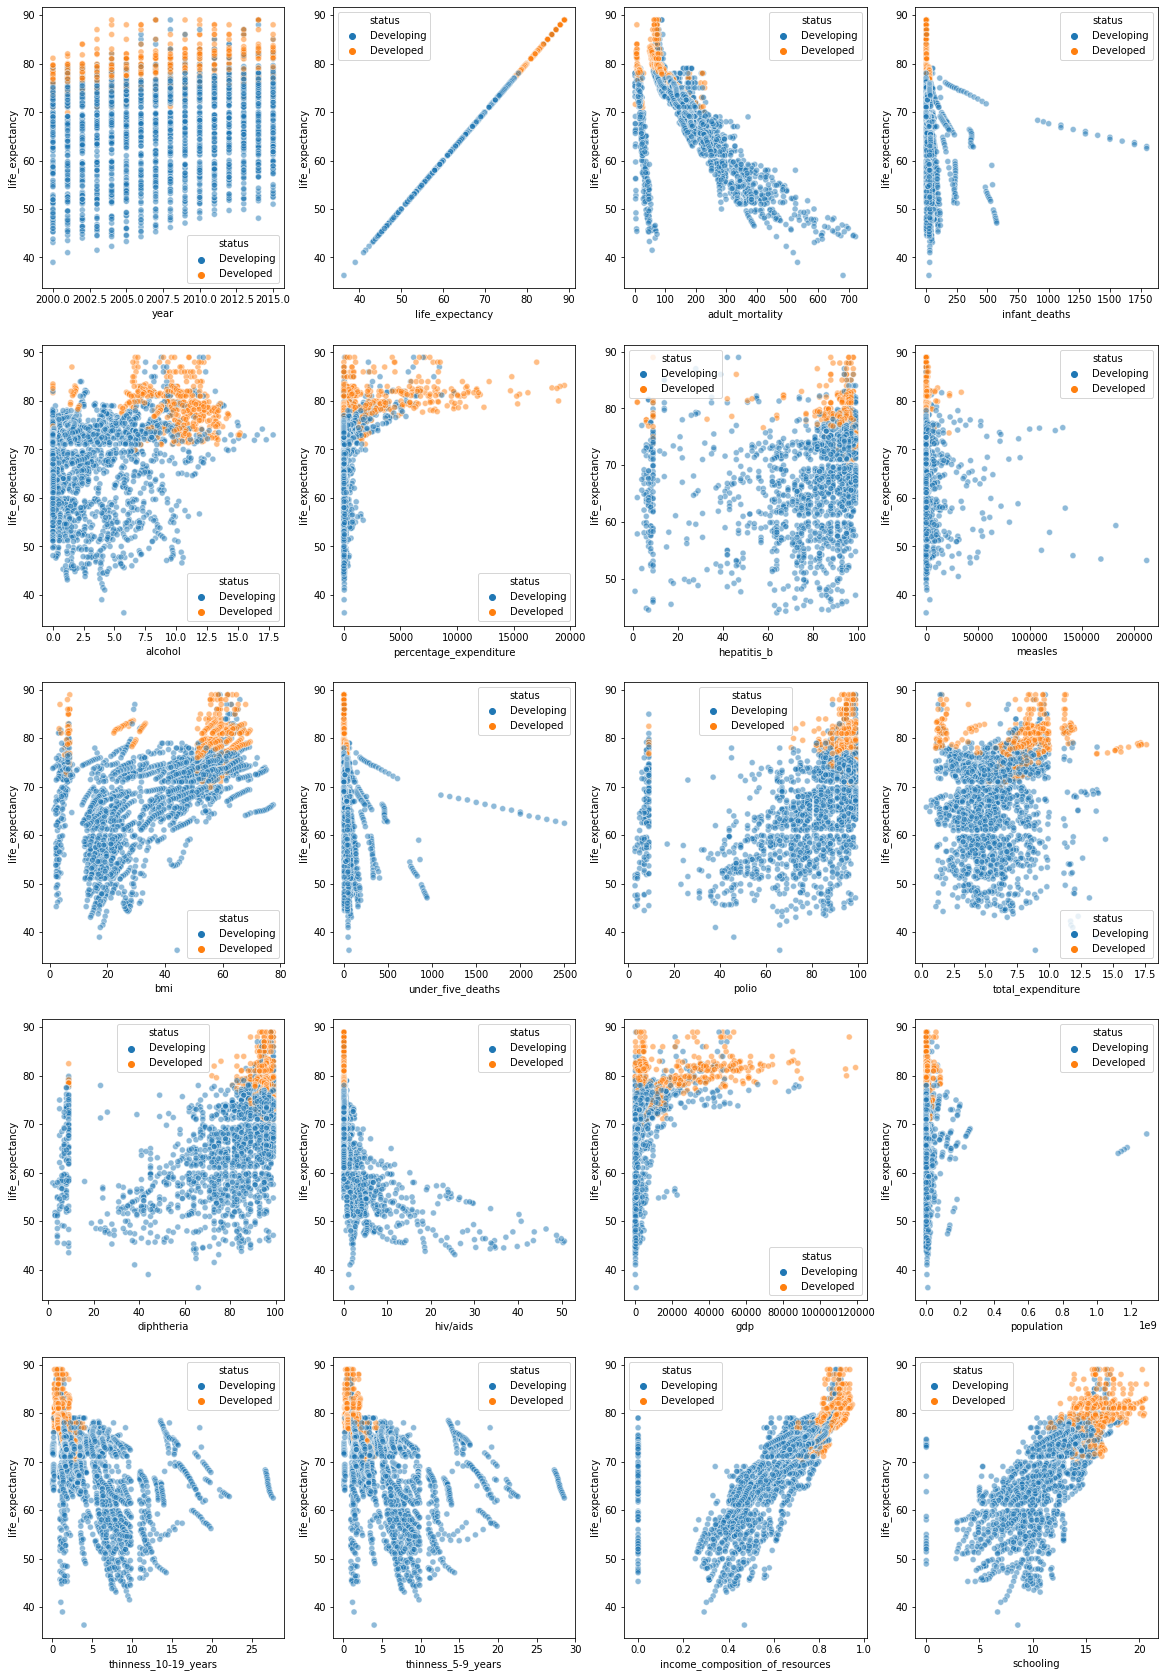

In [32]:
plt.figure(figsize=(20,30))

for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x = df[num_cols[i]], y = df['life_expectancy'], hue = df['status'],alpha = 0.5)

plt.show()

## Inference for Bivariate Analysis
The countries should focus on increasing their expenditure on healthcare and education facility which in turn would increase human development index and contribute to increased life expectancy.

Educating the people plays an important role as basic knowledge about lifestyle, heathcare, sanitization is provided in schools which may help people to live a better life.
providing proper healthcare facilities and access to it. 
On gaining access to both, may help to increase GDP per capita and a good amount of manpower would be available for work.
Thus, increasing the Life Expectancy in any age group of any country.

### 8. Check correlation among the features

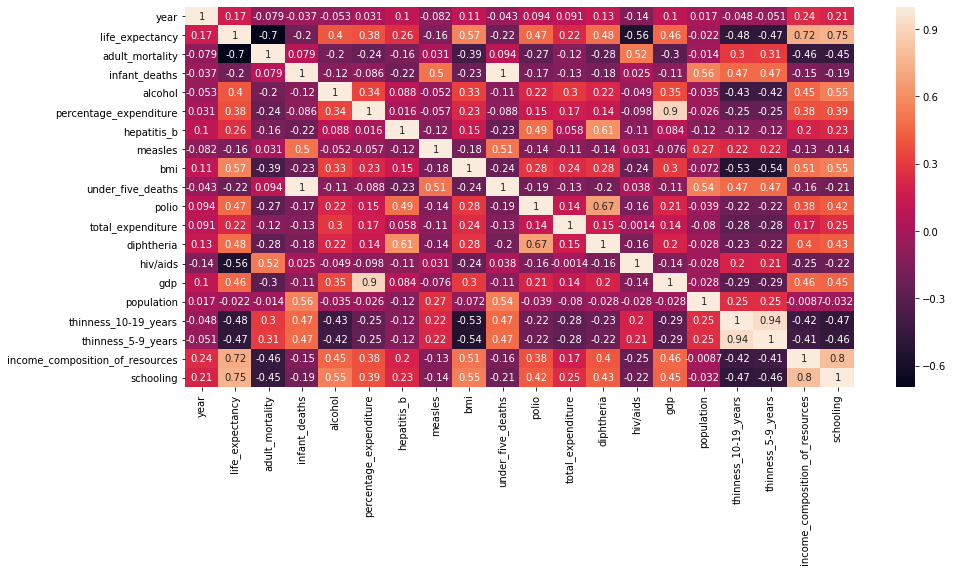

In [33]:
plt.figure(figsize = (15,7))
x = sns.heatmap(df.corr(), annot = True)
bottom, top = x.get_ylim()
x.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [34]:
corr = df.corr()

In [35]:
## get the attributes highly correlated with the target life expectancy

corr.loc[corr['life_expectancy']>= 0.5]['life_expectancy']

life_expectancy                    1.000000
bmi                                0.567694
income_composition_of_resources    0.724776
schooling                          0.751975
Name: life_expectancy, dtype: float64

#####  Life expectancy is highly correlated with bmi,income_composition_of_resources, schooling

In [36]:
## From above values,it can be said that schooling is highly correlated

## now check whether schooling is correlated with any other independent attribute
corr.loc[corr['schooling']>0.5]['schooling']

life_expectancy                    0.751975
alcohol                            0.547378
bmi                                0.546961
income_composition_of_resources    0.800092
schooling                          1.000000
Name: schooling, dtype: float64

#### - Yes,  schooling and income_composition_of_resources are highly correlated which means that both depict same information

In [37]:
corr.loc[corr['income_composition_of_resources']>0.5]['income_composition_of_resources']

life_expectancy                    0.724776
bmi                                0.508774
income_composition_of_resources    1.000000
schooling                          0.800092
Name: income_composition_of_resources, dtype: float64

In [38]:
## get highly correlated features i.e above 0.5

print('The correlated features are as follows:\n')
for i in corr.columns:
    for j in corr.index:
        if (i!=j) & (corr.loc[i,j] > 0.5):
            print('{},{} - {}'.format(i,j,round(corr.loc[i,j],4)))

The correlated features are as follows:

life_expectancy,bmi - 0.5677
life_expectancy,income_composition_of_resources - 0.7248
life_expectancy,schooling - 0.752
adult_mortality,hiv/aids - 0.5238
infant_deaths,measles - 0.5011
infant_deaths,under_five_deaths - 0.9966
infant_deaths,population - 0.5568
alcohol,schooling - 0.5474
percentage_expenditure,gdp - 0.8994
hepatitis_b,diphtheria - 0.6115
measles,infant_deaths - 0.5011
measles,under_five_deaths - 0.5078
bmi,life_expectancy - 0.5677
bmi,income_composition_of_resources - 0.5088
bmi,schooling - 0.547
under_five_deaths,infant_deaths - 0.9966
under_five_deaths,measles - 0.5078
under_five_deaths,population - 0.5444
polio,diphtheria - 0.6736
diphtheria,hepatitis_b - 0.6115
diphtheria,polio - 0.6736
hiv/aids,adult_mortality - 0.5238
gdp,percentage_expenditure - 0.8994
population,infant_deaths - 0.5568
population,under_five_deaths - 0.5444
thinness_10-19_years,thinness_5-9_years - 0.9391
thinness_5-9_years,thinness_10-19_years - 0.9391
inco

##### The above values depict the highly correlated independent features
- This is known as multi-collinearity which needs to be addressed while performing any prediction using linear regression model.

### 9. Population vs Life Expectancy

In [39]:
popdf = pd.DataFrame(df.groupby('country')['population'].sum().values, index = df['country'].unique(), columns = ['Population'])
popdf

,Population
Afghanistan,159556157.0
Albania,11150586.0
Algeria,346397239.0
Angola,162353587.0
Antigua and Barbuda,0.0
...,...
Venezuela (Bolivarian Republic of),0.0
Viet Nam,0.0
Yemen,0.0
Zambia,100163943.0


In [40]:
# Countries having high population
popdf.sort_values(by = 'Population', ascending = False).head(10)

,Population
India,6.743483e+09
Indonesia,1.864884e+09
Brazil,1.410049e+09
Nigeria,1.134032e+09
Pakistan,1.104447e+09
Russian Federation,9.561934e+08
Ethiopia,7.032122e+08
Bangladesh,6.877626e+08
Germany,6.201176e+08
Philippines,5.962464e+08


In [41]:
## countries having high life expectancy

ledf = pd.DataFrame(df.groupby('country')['life_expectancy'].mean().values, index = df['country'].unique(), columns = ['life_expectancy'])
ledf.sort_values(by = 'life_expectancy', ascending = False).head(10)

,life_expectancy
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
France,82.21875
Italy,82.18750
Spain,82.06875
Australia,81.81250
Norway,81.79375
Cameroon,81.68750


In [42]:
## population of Countries having high life expectancy
ledf.merge(popdf,how='inner',left_index = True, right_index = True).sort_values(by = ['life_expectancy','Population'], ascending = False).head(10)

,life_expectancy,Population
Japan,82.53750,1558145.0
Sweden,82.51875,88237893.0
Iceland,82.44375,2978842.0
Switzerland,82.33125,94611869.0
France,82.21875,441307730.0
Italy,82.18750,442300623.0
Spain,82.06875,424685666.0
Australia,81.81250,73392158.0
Norway,81.79375,41830917.0
Cameroon,81.68750,181824861.0


In [43]:
##  life expectancy of Countries having high population
ledf.merge(popdf,how='inner',left_index = True, right_index = True).sort_values(by = 'Population', ascending = False).head(10)

,life_expectancy,Population
India,65.41875,6.743483e+09
Indonesia,67.55625,1.864884e+09
Brazil,73.38125,1.410049e+09
Nigeria,51.35625,1.134032e+09
Pakistan,64.50000,1.104447e+09
Russian Federation,67.76250,9.561934e+08
Ethiopia,59.11250,7.032122e+08
Bangladesh,69.30000,6.877626e+08
Germany,81.17500,6.201176e+08
Philippines,67.57500,5.962464e+08


In [44]:
## Top 10 countries having high population
cnt = ledf.merge(popdf,how='inner',left_index = True, right_index = True).sort_values(by = 'Population', ascending = False).head(10).index
cnt

Index(['India', 'Indonesia', 'Brazil', 'Nigeria', 'Pakistan',
       'Russian Federation', 'Ethiopia', 'Bangladesh', 'Germany',
       'Philippines'],
      dtype='object')

In [45]:
developing [ developing['country'].isin(cnt)]['country'].unique()

array(['Bangladesh', 'Brazil', 'Ethiopia', 'India', 'Indonesia',
       'Nigeria', 'Pakistan', 'Philippines', 'Russian Federation'],
      dtype=object)

In [46]:
developed[ developed['country'].isin(cnt)]['country'].unique()

array(['Germany'], dtype=object)

##### From above analysis of life expectancy based on population, 
- it can be concluded that densely populated countries tend to have low life expectancy if not provided with adequate education and healthcare facilities

### 10. Total Expenditure vs Life Expectancy

In [47]:
tedf = pd.DataFrame(df.groupby('country')['total_expenditure'].mean().values, index = df['country'].unique(), columns = ['total_expenditure'])
tedf

,total_expenditure
Afghanistan,8.252500
Albania,5.945625
Algeria,4.604000
Angola,3.919333
Antigua and Barbuda,4.791333
...,...
Venezuela (Bolivarian Republic of),4.998667
Viet Nam,5.977333
Yemen,5.005333
Zambia,5.824000


In [48]:
# Countries having high total_expenditure
tedf.sort_values(by = 'total_expenditure', ascending = False).head(10)

,total_expenditure
Marshall Islands,17.240000
Tuvalu,16.610000
United States of America,15.863333
Micronesia (Federated States of),11.056000
Sweden,9.932667
Palau,9.270000
Sierra Leone,9.218000
Norway,9.086000
Greece,9.038667
New Zealand,8.876000


In [49]:
## life expectancy of Countries having high total_expenditure
tedf.merge(ledf,how='inner',left_index = True, right_index = True).sort_values(by = ['total_expenditure','life_expectancy'], ascending = False).head(10)

,total_expenditure,life_expectancy
Marshall Islands,17.240000,NaN
Tuvalu,16.610000,NaN
United States of America,15.863333,78.06250
Micronesia (Federated States of),11.056000,68.20000
Sweden,9.932667,82.51875
Palau,9.270000,NaN
Sierra Leone,9.218000,46.11250
Norway,9.086000,81.79375
Greece,9.038667,81.21875
New Zealand,8.876000,81.33750


In [50]:
## Top 10 countries having high population
cnt = tedf.merge(popdf,how='inner',left_index = True, right_index = True).sort_values(by = 'total_expenditure', ascending = False).head(10).index
cnt


Index(['Marshall Islands', 'Tuvalu', 'United States of America',
       'Micronesia (Federated States of)', 'Sweden', 'Palau', 'Sierra Leone',
       'Norway', 'Greece', 'New Zealand'],
      dtype='object')

In [51]:
developing[developing['country'].isin(cnt)]['country'].unique()

array(['Greece', 'Marshall Islands', 'Micronesia (Federated States of)',
       'Palau', 'Sierra Leone', 'Tuvalu'], dtype=object)

In [52]:
developed[ developed['country'].isin(cnt)]['country'].unique()

array(['New Zealand', 'Norway', 'Sweden', 'United States of America'],
      dtype=object)

##### Here, it is observed that 
- the developed countries invest more on the health care plus education facilities  as compared to developing countries and thus have high life expectancy

### 11. GDP vs Life Expectancy

In [53]:
gdpdf = pd.DataFrame(df.groupby('country')['gdp'].mean().values, index = df['country'].unique(), columns = ['gdp'])
gdpdf

,gdp
Afghanistan,340.015425
Albania,2119.726679
Algeria,2847.853392
Angola,1975.143045
Antigua and Barbuda,9759.305728
...,...
Venezuela (Bolivarian Republic of),NaN
Viet Nam,NaN
Yemen,NaN
Zambia,811.811841


In [54]:
# Countries having high total_expenditure
gdpdf.sort_values(by = 'gdp', ascending = False).head(10)



,gdp
Switzerland,57362.874601
Luxembourg,53257.012741
Qatar,40748.444104
Netherlands,34964.719797
Australia,34637.565047
Ireland,33835.272005
Austria,33827.476309
Denmark,33067.407916
Singapore,32790.105907
Kuwait,31914.378339


In [55]:
## life expectancy of Countries having high total_expenditure

gdpdf.merge(ledf,how='inner',left_index = True, right_index = True).sort_values(by = ['gdp','life_expectancy'], ascending = False).head(10)

,gdp,life_expectancy
Switzerland,57362.874601,82.33125
Luxembourg,53257.012741,80.78125
Qatar,40748.444104,77.03125
Netherlands,34964.719797,81.13125
Australia,34637.565047,81.81250
Ireland,33835.272005,80.15000
Austria,33827.476309,81.48125
Denmark,33067.407916,79.25625
Singapore,32790.105907,81.47500
Kuwait,31914.378339,73.84375


In [56]:
## life expectancy of Countries having low total_expenditure
gdpdf.merge(ledf,how='inner',left_index = True, right_index = True).sort_values(by = ['gdp','life_expectancy']).head(10)



,gdp,life_expectancy
Nauru,136.183210,NaN
Burundi,137.815321,55.53750
Malawi,237.504042,49.89375
Liberia,246.281748,57.52500
Eritrea,259.395356,60.68750
Niger,259.782441,56.98125
Ethiopia,264.970950,59.11250
Sierra Leone,271.505561,46.11250
Senegal,274.611166,62.56875
Guinea,279.464798,56.01250


In [57]:
## Top 10 Countries having high total_expenditure
cnt = gdpdf.merge(ledf,how='inner',left_index = True, right_index = True).sort_values(by = ['gdp','life_expectancy'], 
                                                                                ascending = False).head(10).index
cnt

Index(['Switzerland', 'Luxembourg', 'Qatar', 'Netherlands', 'Australia',
       'Ireland', 'Austria', 'Denmark', 'Singapore', 'Kuwait'],
      dtype='object')

In [58]:
developing[developing['country'].isin(cnt)]['country'].unique()

array(['Kuwait', 'Qatar'], dtype=object)

In [59]:
developed[ developed['country'].isin(cnt)]['country'].unique()

array(['Australia', 'Austria', 'Denmark', 'Ireland', 'Luxembourg',
       'Netherlands', 'Singapore', 'Switzerland'], dtype=object)


##### Inferences
high gdp may lead to high life expectancy

developed countries have high gdp than developing countries

As depicted here, QATAR is at 3rd position in top 5 gdp countries, we can say that qatar being a developing country is doing great but needs to focus more on increasing life expectancy of its citizens.

### 12. Comparing Developed and Developing countries

In [60]:
years = developed['year'].unique()
years.sort()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [61]:
## For developed Countries
col = ['life_expectancy','adult_mortality','infant_deaths','bmi','gdp', 'schooling']
developed_comp_dict = {}
for i in col:
    developed_comp_dict.update({'Avg_'+i: developed.groupby('year')[i].mean().values})
df1 = pd.DataFrame(developed_comp_dict, index = years)
df1.head(2)

,Avg_life_expectancy,Avg_adult_mortality,Avg_infant_deaths,Avg_bmi,Avg_gdp,Avg_schooling
2000,76.803125,91.71875,1.78125,45.58125,15215.825425,14.982759
2001,77.128125,90.28125,1.75000,48.95000,16036.874398,15.124138


In [62]:
## For developing countries

developing_comp_dict = {}
for i in col:
    developing_comp_dict.update({'Avg_'+i: developing.groupby('year')[i].mean().values})
df2 = pd.DataFrame(developing_comp_dict, index = years )
df2.head(2)

,Avg_life_expectancy,Avg_adult_mortality,Avg_infant_deaths,Avg_bmi,Avg_gdp,Avg_schooling
2000,64.619868,200.496689,45.119205,32.028859,2373.557362,9.612500
2001,65.009934,193.158940,44.258278,33.383893,2389.128353,10.109722


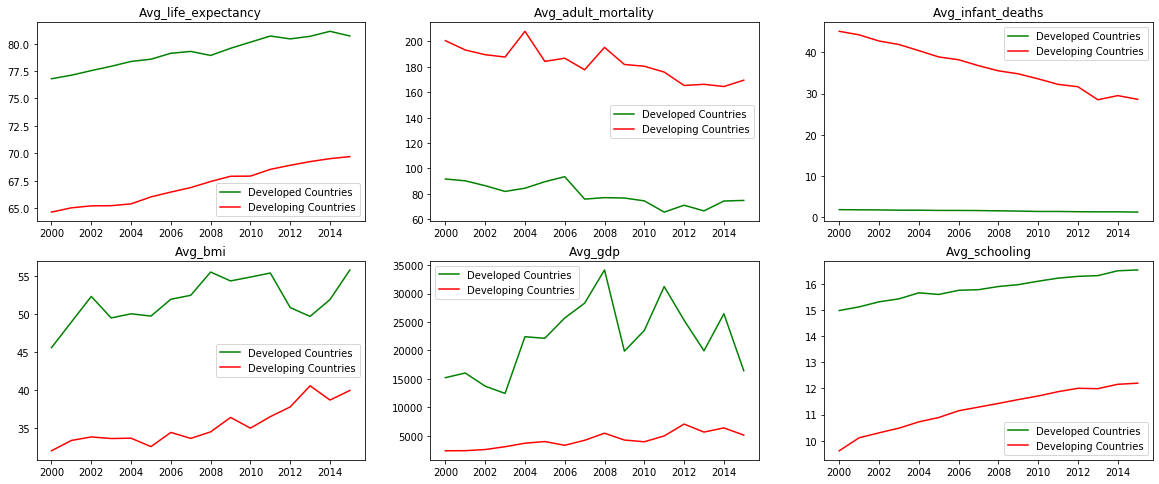

In [63]:
plt.figure(figsize=(20,30))

for i in range(len(df1.columns.tolist())):
    plt.subplot(7,3,i+1)
    plt.plot(df1[df1.columns.tolist()[i]],color = 'g', label = 'Developed Countries')
    plt.plot(df2[df2.columns.tolist()[i]],color = 'r', label = 'Developing Countries')
    plt.legend()
    plt.title(df1.columns.tolist()[i])
plt.show()

## Inferences
- For developing countries
    1. over the years the life expectancy has increased 
    2. the adult and infant mortality rates have gone down slightly each year
    3. BMI has also shown a slight increase 
    4. Average GDP improving each year but that high
    5. Average schooling years seem to increase over the years
    

- For developed countries
    1. over the years the life expectancy has increased though it is high each year than developing countries
    2. the adult and infant mortality rates are very low and are decreasing further
    3. BMI is maintained (neither to low nor too high) 
    4. Average GDP, high each as the people get adequate facilities which increase their productivity
    5. Average schooling years are high. This indicates that most people have access to right kind of education.
